# Import e Upload


In [4]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving Folha_Entre_Rios_agosto - folha.csv to Folha_Entre_Rios_agosto - folha.csv


# Folha - Prefeitura Municipal de Entre Rios de Minas

## As informações desta base de dados são disponibilizadas pelo Portal da Transparência no site oficial da Prefeitura

Houve um tratamento para que ficasse num melhor formato para a análise e removido a coluna de "Nome" visando a LGPD.

A ideia, neste momento, é somente uma visão da folha da cidade. Sem julgamentos e sem interesses políticos sobre salários ou quantidade de funcionários.

In [54]:
#Criando o DataFrame
df = pd.read_csv("Folha_Entre_Rios_agosto - folha.csv") 

In [55]:
#Visualizando as 5 primeiras linhas
df.head()

,nm_vinculo,nm_matricula,nr_cpf,ds_situacao,ds_admissao,ds_cargo,ds_funcao,ds_lotacao,sg_carga,ds_beneficio,nr_remunera_bruta,nr_remunera_liquida
0,132,132,***.179196-**,Ativo,Efetivo,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,MAN DA LIMPEZA PUBLICA USINA,EFETIVO,NaN,"30.216,52","30.119,63"
1,2530,2530,***.179076-**,Ativo,Agente Político,PREFEITO,PREFEITO,MANUTENCAO GABINETE DO PREFEITO,AGENTE POLÍTICO,NaN,"22.176,84","16.347,00"
2,4358,3669,***.780646-**,Ativo,Contratado,MEDICO PSF,MEDICO PSF,MAN DO PROGRAMA DE SAUDE DA FAMILIA,SERVIDOR TEMPORÁRIO,NaN,"16.932,33","12.544,73"
3,4082,3589,***.151216-**,Ativo,Contratado,MEDICO PSF,MEDICO PSF,MAN DO PROGRAMA DE SAUDE DA FAMILIA,SERVIDOR TEMPORÁRIO,NaN,"16.932,23","12.544,66"
4,4151,3618,***.072896-**,Ativo,Contratado,MEDICO PSF,MEDICO PSF,MAN DO PROGRAMA DE SAUDE DA FAMILIA,SERVIDOR TEMPORÁRIO,NaN,"16.932,23","12.544,66"


In [56]:
#Quantidade de linhas e colunas
df.shape

(700, 12)

In [57]:
#Verificando os tipos de dados
df.dtypes

nm_vinculo              int64
nm_matricula            int64
nr_cpf                 object
ds_situacao            object
ds_admissao            object
ds_cargo               object
ds_funcao              object
ds_lotacao             object
sg_carga               object
ds_beneficio           object
nr_remunera_bruta      object
nr_remunera_liquida    object
dtype: object

In [62]:
#Alterando o tipo das variáveis de remuneração
df["nr_remunera_liquida"] = (df["nr_remunera_liquida"].str.replace('.', ''))
df["nr_remunera_liquida"] = pd.to_numeric(df["nr_remunera_liquida"].str.replace(',', '.'))
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


nm_vinculo               int64
nm_matricula             int64
nr_cpf                  object
ds_situacao             object
ds_admissao             object
ds_cargo                object
ds_funcao               object
ds_lotacao              object
sg_carga                object
ds_beneficio            object
nr_remunera_bruta       object
nr_remunera_liquida    float64
dtype: object

In [64]:
df["nr_remunera_bruta"] = (df["nr_remunera_bruta"].str.replace('.', ''))
df["nr_remunera_bruta"] = pd.to_numeric(df["nr_remunera_bruta"].str.replace(',', '.'))
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


nm_vinculo               int64
nm_matricula             int64
nr_cpf                  object
ds_situacao             object
ds_admissao             object
ds_cargo                object
ds_funcao               object
ds_lotacao              object
sg_carga                object
ds_beneficio            object
nr_remunera_bruta      float64
nr_remunera_liquida    float64
dtype: object

In [169]:
#Qual o gasto da folha de agosto total?
df["nr_remunera_bruta"].sum()

1722515.84

In [115]:
df.describe()

,nm_vinculo,nm_matricula,nr_remunera_bruta,nr_remunera_liquida
count,700.00,700.00,700.00,700.00
mean,"3,222.77","2,609.49","2,460.74","2,192.02"
std,"1,543.07","1,230.76","2,227.28","1,888.80"
min,2.00,3.00,0.00,0.00
25%,"3,476.50","2,310.75","1,567.34","1,452.44"
50%,"3,981.50","3,179.50","1,987.73","1,827.02"
75%,"4,235.25","3,472.25","2,557.23","2,340.29"
max,"4,419.00","3,692.00","30,216.52","30,119.63"


In [135]:
iw = (df["nr_remunera_liquida"].max()-df["nr_remunera_liquida"].min())/10

In [150]:
#Construindo uma tabela de frequência

3011.963

# Construindo uma tabela de frequência

In [152]:
import numpy as np
Abs_frecuency, intervals = np.histogram(df["nr_remunera_liquida"], bins = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 310000])

In [170]:
# Create dataframe
tabela_freq = pd.DataFrame(index = np.linspace(1,8,8), columns = ['start', 'end','Frec_abs'])
# Assign the intervals
tabela_freq['start'] = intervals[:-1]
tabela_freq['end'] = intervals[1:]
# Assing Absolute frecuency
tabela_freq['Frec_abs'] = Abs_frecuency
tabela_freq

,start,end,Frec_abs
1.00,0,1000,26
2.00,1000,2000,441
3.00,2000,3000,134
4.00,3000,4000,45
5.00,4000,5000,34
6.00,5000,10000,11
7.00,10000,20000,8
8.00,20000,310000,1


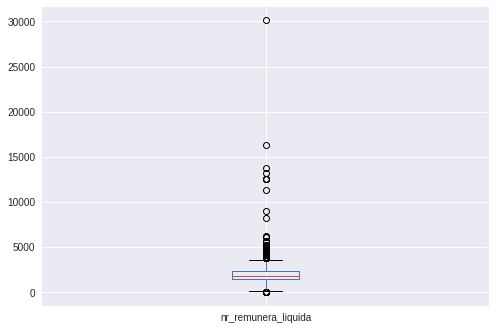

In [122]:
df.boxplot(column=["nr_remunera_liquida"])

 **Missing Values**

In [67]:
#Verificando se temos dados faltantes
df.isnull().sum()

nm_vinculo               0
nm_matricula             0
nr_cpf                   0
ds_situacao              0
ds_admissao              0
ds_cargo                 0
ds_funcao                0
ds_lotacao               0
sg_carga                 9
ds_beneficio           672
nr_remunera_bruta        0
nr_remunera_liquida      0
dtype: int64

In [70]:
#Agrupando por Função
df.groupby([df["ds_funcao"]])["nr_remunera_liquida"].sum()

ds_funcao
AGENTE COMUNITARIO DE SAUDE PSF                35,594.51
AGENTE DE COMBATE A ENDEMIAS                   14,112.62
APOSENTADO(A)                                  59,291.29
ASSESSOR DE GESTAO                              2,966.12
ASSESSOR TECNICO I                              6,439.80
                                            ...         
TECNICO DE CONTABILIDADE AUTONOMO               1,068.00
TECNICO DE ENFERMAGEM                          47,938.27
TERAPEUTA OCUPACIONAL                           6,571.81
VICE DIRETOR DE ESCOLA                          5,672.56
VICE PREFEITO                                   4,441.87
Name: nr_remunera_liquida, Length: 71, dtype: float64

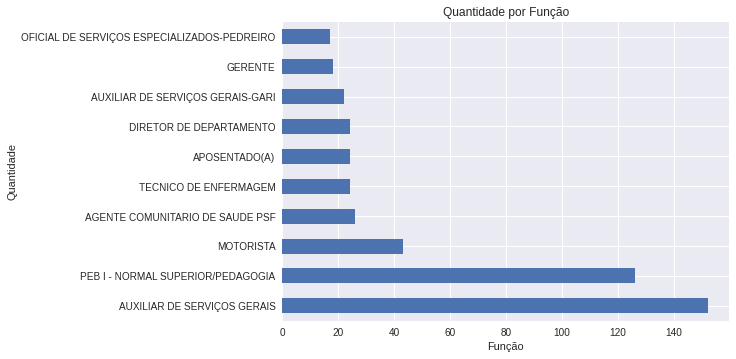

In [91]:
#Gráfico Top 10 - Quantidade de func por função
df.groupby([df["ds_funcao"]])["nr_remunera_liquida"].count().sort_values(ascending=False)[:10].plot.barh(title="Quantidade por Função")
plt.xlabel("Quantidade")
plt.ylabel("Função");

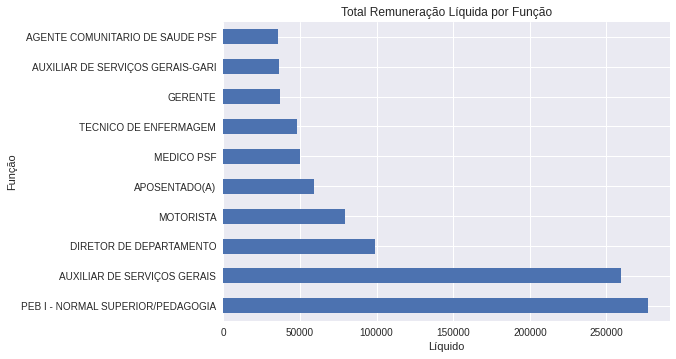

In [92]:
#Gráfico Top 10 - Quantidade de remuneração por função
df.groupby([df["ds_funcao"]])["nr_remunera_liquida"].sum().sort_values(ascending=False)[:10].plot.barh(title="Total Remuneração Líquida por Função")
plt.xlabel("Líquido")
plt.ylabel("Função");

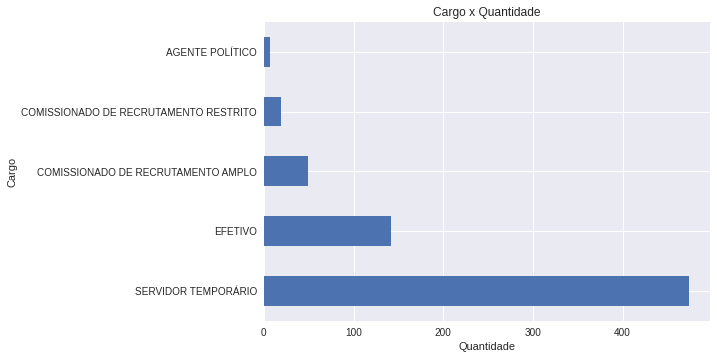

In [93]:
df.groupby([df["sg_carga"]])["nr_remunera_liquida"].count().sort_values(ascending=False).plot.barh(title="Cargo x Quantidade")
plt.xlabel("Quantidade")
plt.ylabel("Cargo");

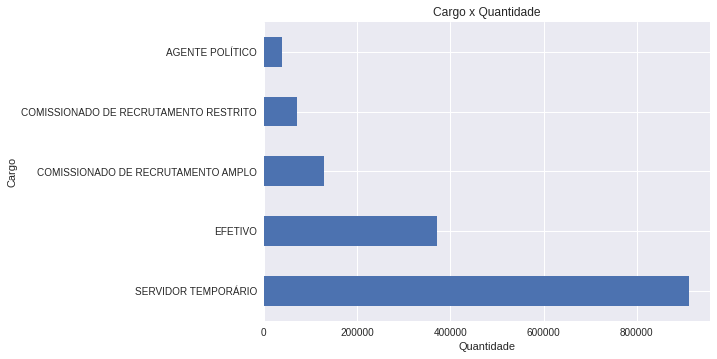

In [97]:
df.groupby([df["sg_carga"]])["nr_remunera_liquida"].sum().sort_values(ascending=False).plot.barh(title="Cargo x Quantidade")
plt.xlabel("Quantidade")
plt.ylabel("Cargo");

In [101]:
#Selecionando apenas os auxiliares de serviços gerais
df_auxiliar = df[df["ds_funcao"] == "AUXILIAR DE SERVIÇOS GERAIS"]

In [102]:
df_auxiliar.head()

,nm_vinculo,nm_matricula,nr_cpf,ds_situacao,ds_admissao,ds_cargo,ds_funcao,ds_lotacao,sg_carga,ds_beneficio,nr_remunera_bruta,nr_remunera_liquida
0,132,132,***.179196-**,Ativo,Efetivo,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,MAN DA LIMPEZA PUBLICA USINA,EFETIVO,NaN,"30,216.52","30,119.63"
49,3578,3019,***.242336-**,Inativo,Contratado,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,MAN DA LIMPEZA PUBLICA USINA,SERVIDOR TEMPORÁRIO,NaN,"5,009.60","4,936.88"
61,294,294,***.718296-**,Ativo,Efetivo,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,DESENV ATIV CURRICULARES DO ENSINO FUNDAMENTA,EFETIVO,NaN,"4,568.97","4,455.17"
74,3594,3036,***.234246-**,Ativo,Contratado,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,MAN DAS ESTRADAS VICINAIS E TRANSISTO,SERVIDOR TEMPORÁRIO,NaN,"3,939.00","3,885.98"
174,63,63,***.160276-**,Ativo,Efetivo,AUXILIAR DE SERVIÇOS GERAIS,AUXILIAR DE SERVIÇOS GERAIS,MAN DAS ESTRADAS VICINAIS E TRANSITO,EFETIVO,NaN,"2,569.44","2,318.51"


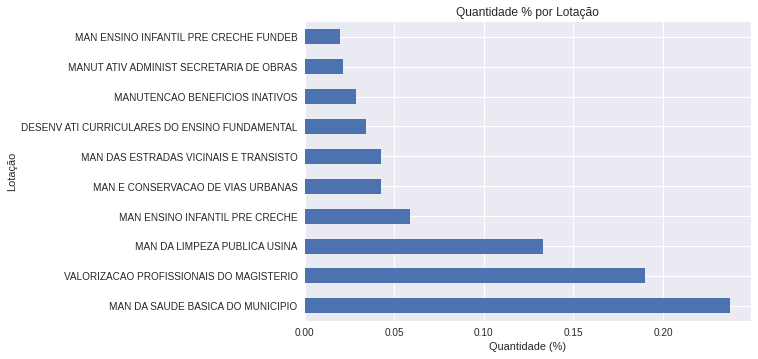

In [114]:
(df.groupby([df["ds_lotacao"]])["nr_remunera_liquida"].count()/df["nr_remunera_liquida"].count()).sort_values(ascending=False)[:10].plot.barh(title="Quantidade % por Lotação")
plt.xlabel("Quantidade (%)")
plt.ylabel("Lotação");

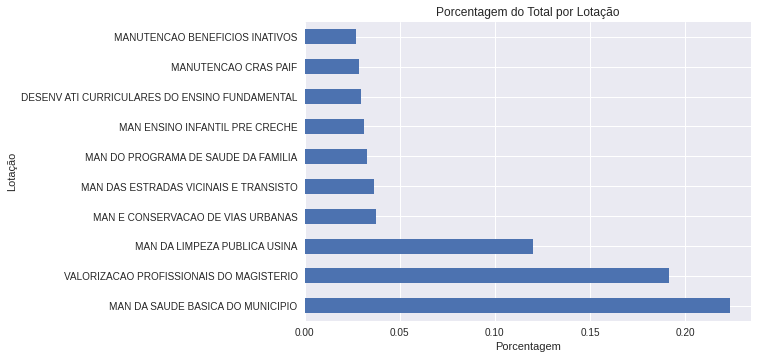

In [111]:
(df.groupby([df["ds_lotacao"]])["nr_remunera_liquida"].sum()/df["nr_remunera_liquida"].sum()).sort_values(ascending=False)[:10].plot.barh(title="Porcentagem do Total por Lotação")
plt.xlabel("Porcentagem")
plt.ylabel("Lotação");